# Hands-on: Aplicando o MLP no dataset Fashion-MNIST 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint   


Using TensorFlow backend.


### 1.   Carregando o dataset FASHION MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print("O training set possui %d exemplos." % len(X_train))
print("O test set possui %d exemplos." % len(X_test))

4423680/4422102 [==============================] - 2s 1us/step
O training set possui 60000 exemplos.
O test set possui 10000 exemplos.


### 2.  Análise Exploratória



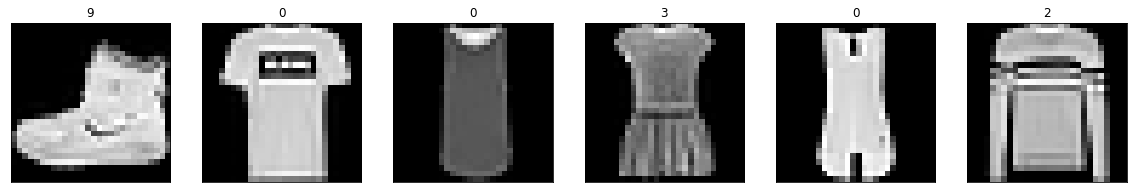

In [3]:
# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. Como imagens são representadas em um computador?

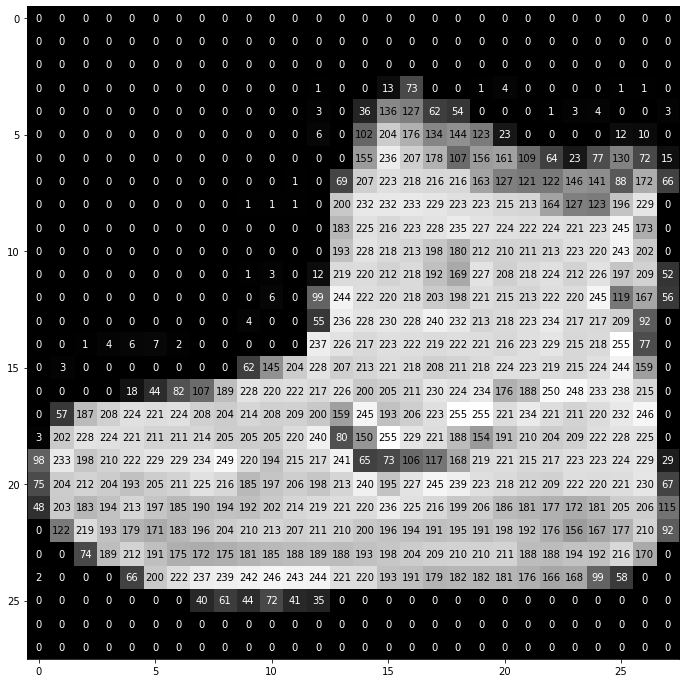

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Normalizando valor dos pixels para o range entre 0 e 1

In [5]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Codificando saídas categóricas utilizando a estratégia One-Hot Encoding


In [6]:
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[9 0 0 3 0 2 7 2 5 5]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


### 6. Modelagem

In [7]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)      

### 7. Compilando o Modelo

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Carregando o modelo que possuia a melhor acurácia (antes do treinamento da rede)

In [9]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 7.7400%


### 9. Treinando o modelo


In [10]:
# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 286us/step - loss: 0.5906 - acc: 0.7856 - val_loss: 0.4120 - val_acc: 0.8535

Epoch 00001: val_loss improved from inf to 0.41203, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 13s 276us/step - loss: 0.4149 - acc: 0.8463 - val_loss: 0.3670 - val_acc: 0.8681

Epoch 00002: val_loss improved from 0.41203 to 0.36696, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 13s 261us/step - loss: 0.3758 - acc: 0.8630 - val_loss: 0.3715 - val_acc: 0.8720

Epoch 00003: val_loss did not improve from 0.36696
Epoch 4/10
48000/48000 [==============================] - 13s 270us/step - loss: 0.3542 - acc: 0.8714 - val_loss: 0.3626 - val_acc: 0.8713

Epoch 00004: val_loss improved from 0.36696 to 0.36259, saving model to mnist.model.best.hdf5
Epoch 5/10
48

### 10. Carregando o modelo que possui a melhor acurácia no dataset de validação

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculando a acurácia no dataset de teste

In [12]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.7600%
